### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
# plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

In [4]:
sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/'
idir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'

tdats = ['JRA']#NCEP-DOE', 'MERRA']#'ERA5','NCEP-NCAR','UKESM', 

ex = False

if ex:

    for yr in range(1940,2024):
        for tdat in tdats:
            try:
                w = xr.open_dataset(f'{sdir}{tdat}/{tdat}_wind_daily_1x1_{yr}.nc')
                q = w.sel(lat=slice(-70, -30))
                max_lat_indices = q.u10m.argmax(dim='lat')
                max_lats = q.u10m.lat[max_lat_indices]
                print(f'JETLAT_{tdat}_{yr}.nc')
                max_lats.to_netcdf(f'{idir}/JETLAT_{tdat}_{yr}.nc')
            except:
                print(f'no for {tdat} {yr}')

In [5]:
import xarray as xr
baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'
ty = f'{baseDir}/JETLAT_MERRA_1980.nc'
w = xr.open_dataset(ty)
w

<xarray.Dataset>
Dimensions:                        (lon: 360, time_counter: 366)
Coordinates:
    lat                            (time_counter, lon) float64 ...
  * time_counter                   (time_counter) datetime64[ns] 1980-01-01 ....
  * lon                            (lon) float64 0.0 1.0 2.0 ... 358.0 359.0
Data variables:
    __xarray_dataarray_variable__  (time_counter, lon) float64 ...
Attributes:
    __xarray_dataarray_name__:  lat

In [80]:
def make_yearlist(tdat, yrst = 1980, yrend = 2019, baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/JETLAT_{tdat}_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist


In [7]:
# era5 = xr.open_mfdataset(make_yearlist('ERA5'))
# ncep = xr.open_mfdataset(make_yearlist('NCEP-NCAR'))
# doe = xr.open_mfdataset(make_yearlist('NCEP-DOE'))
# ukesm = xr.open_mfdataset(make_yearlist('UKESM'))
# jra = xr.open_mfdataset(make_yearlist('JRA'))
# ukesm = xr.open_mfdataset(make_yearlist('MERRA'))

In [81]:
dss = ['NCEP-DOE','ERA5','NCEP-NCAR','UKESM','MERRA','JRA']
#dss = ['JRA']
ex = False

if ex:
    for ds in dss:
        print(ds)
        tdat = xr.open_mfdataset(make_yearlist(ds))
        tdat_fy = tdat.groupby('time_counter.year').mean()
        tdat_djf = tdat.sel(time_counter=(tdat['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
        tdat_mam = tdat.sel(time_counter=(tdat['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
        tdat_jja = tdat.sel(time_counter=(tdat['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
        tdat_son = tdat.sel(time_counter=(tdat['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()

        tdat_fy.rename({"__xarray_dataarray_variable__": "lat"})
        tdat_djf.rename({"__xarray_dataarray_variable__": "lat"})
        tdat_mam.rename({"__xarray_dataarray_variable__": "lat"})
        tdat_jja.rename({"__xarray_dataarray_variable__": "lat"})
        tdat_son.rename({"__xarray_dataarray_variable__": "lat"})

        tdat_fy.to_netcdf(f'{idir}/{ds}_mnjet_FY.nc')
        tdat_djf.to_netcdf(f'{idir}/{ds}_mnjet_DJF.nc')
        tdat_mam.to_netcdf(f'{idir}/{ds}_mnjet_MAM.nc')
        tdat_jja.to_netcdf(f'{idir}/{ds}_mnjet_SON.nc')
        tdat_son.to_netcdf(f'{idir}/{ds}_mnjet_JJA.nc')
        
dss = ['NCEP-DOE','ERA5','NCEP-NCAR','UKESM','MERRA',]
dss = ['UKESM','ERA5']

if ex:
    for ds in dss:
        print(ds)
        tdat = xr.open_mfdataset(make_yearlist(ds))
        tdat_fy = tdat.groupby('time_counter.year').mean()#.std()
        tdat_std = (tdat_fy.std(dim = 'year'))
        #print(tdat_std.__xarray_dataarray_variable__.values)
#         tdat_djf = tdat.sel(time_counter=(tdat['time_counter.season'] == 'DJF')).groupby('time_counter.year').std()
#         tdat_mam = tdat.sel(time_counter=(tdat['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
#         tdat_jja = tdat.sel(time_counter=(tdat['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
#         tdat_son = tdat.sel(time_counter=(tdat['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()

#         tdat_fy.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_djf.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_mam.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_jja.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_son.rename({"__xarray_dataarray_variable__": "lat"})

        tdat_std.to_netcdf(f'{idir}/{ds}_stdjet_FY.nc')
#         tdat_djf.to_netcdf(f'{idir}/{ds}_mnjet_DJF.nc')
#         tdat_mam.to_netcdf(f'{idir}/{ds}_mnjet_MAM.nc')
#         tdat_jja.to_netcdf(f'{idir}/{ds}_mnjet_SON.nc')
#         tdat_son.to_netcdf(f'{idir}/{ds}_mnjet_JJA.nc')





NCEP-DOE
ERA5
NCEP-NCAR
UKESM
MERRA
JRA
UKESM
ERA5


In [82]:
# dss = ['NCEP-DOE','ERA5','NCEP-NCAR','UKESM','MERRA',]
# dss = ['JRA']
# ex = False

# if ex:
#     for ds in dss:
#         print(ds)
#         tdat = xr.open_mfdataset(make_yearlist(ds))
#         tdat_fy = tdat.groupby('time_counter.year').mean()
#         tdat_djf = tdat.sel(time_counter=(tdat['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
#         tdat_mam = tdat.sel(time_counter=(tdat['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
#         tdat_jja = tdat.sel(time_counter=(tdat['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
#         tdat_son = tdat.sel(time_counter=(tdat['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()

#         tdat_fy.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_djf.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_mam.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_jja.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_son.rename({"__xarray_dataarray_variable__": "lat"})

#         tdat_fy.to_netcdf(f'{idir}/{ds}_mnjet_FY.nc')
#         tdat_djf.to_netcdf(f'{idir}/{ds}_mnjet_DJF.nc')
#         tdat_mam.to_netcdf(f'{idir}/{ds}_mnjet_MAM.nc')
#         tdat_jja.to_netcdf(f'{idir}/{ds}_mnjet_SON.nc')
#         tdat_son.to_netcdf(f'{idir}/{ds}_mnjet_JJA.nc')



In [83]:
dss = ['NCEP-DOE','ERA5','NCEP-NCAR','UKESM','MERRA',]
dss = ['UKESM','ERA5']
ex = False

if ex:
    for ds in dss:
        print(ds)
        tdat = xr.open_mfdataset(make_yearlist(ds))
        tdat_fy = tdat.groupby('time_counter.year').mean()#.std()
        tdat_std = (tdat_fy.std(dim = 'year'))
        #print(tdat_std.__xarray_dataarray_variable__.values)
#         tdat_djf = tdat.sel(time_counter=(tdat['time_counter.season'] == 'DJF')).groupby('time_counter.year').std()
#         tdat_mam = tdat.sel(time_counter=(tdat['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
#         tdat_jja = tdat.sel(time_counter=(tdat['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
#         tdat_son = tdat.sel(time_counter=(tdat['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()

#         tdat_fy.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_djf.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_mam.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_jja.rename({"__xarray_dataarray_variable__": "lat"})
#         tdat_son.rename({"__xarray_dataarray_variable__": "lat"})

        tdat_std.to_netcdf(f'{idir}/{ds}_stdjet_FY.nc')
#         tdat_djf.to_netcdf(f'{idir}/{ds}_mnjet_DJF.nc')
#         tdat_mam.to_netcdf(f'{idir}/{ds}_mnjet_MAM.nc')
#         tdat_jja.to_netcdf(f'{idir}/{ds}_mnjet_SON.nc')
#         tdat_son.to_netcdf(f'{idir}/{ds}_mnjet_JJA.nc')



Text(0.5, 1.0, 'annual mean jet position, austral summer')

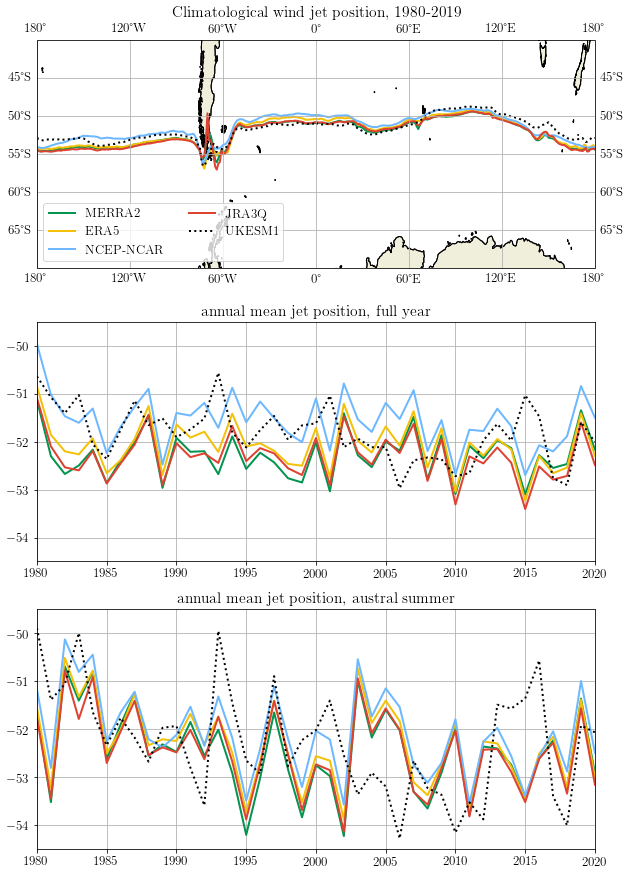

In [22]:
import coldic as cd
reload(cd)

dss = ['MERRA','ERA5','NCEP-NCAR','JRA','UKESM',]

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# First subplot: Map using Cartopy
ax = plt.subplot(311, projection=ccrs.PlateCarree())
ax.set_title('Climatological wind jet position, 1980-2019')
# Set the extent of the map (lon_min, lon_max, lat_min, lat_max)
ax.set_extent([-180, 180, -70, -40], crs=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add land and ocean features
ax.add_feature(cfeature.LAND, edgecolor='black')
#ax.add_feature(cfeature.OCEAN)

for ds in dss:
    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY.nc')
    ax.plot(tdat.lon,np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'year').values), \
            color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'], linewidth = 2, 
            linestyle =cd.prod[ds]['linestyle'],\
            transform=ccrs.PlateCarree())

ax.set_aspect(4.91)
ax.legend(ncol = 2, loc = 'lower left')

# Second subplot: Regular Matplotlib plot
ax2 = axes[1]
for ds in dss:

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY.nc')
    td = tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values
    ax2.plot(tdat.year,td, color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'], linewidth = 2, \
            linestyle =cd.prod[ds]['linestyle'] )
ax2.set_ylim([-54.5,-49.5])
ax2.set_xlim([1980,2020])
ax2.grid()
ax2.set_title("annual mean jet position, full year")


# Third subplot: Another regular Matplotlib plot
ax2 = axes[2]
for ds in dss:

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_DJF.nc')
    td = tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values
    ax2.plot(tdat.year,td, color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'],\
            linestyle =cd.prod[ds]['linestyle'], linewidth = 2)
ax2.set_ylim([-54.5,-49.5])
ax2.set_xlim([1980,2020])
ax2.grid()
ax2.set_title("annual mean jet position, austral summer")
#fig.savefig('./plts/Fig-wind-jet.jpg', dpi = 300, bbox_inches='tight')

In [70]:
def moving_average(timeseries, n = 3):
    # Ensure n is valid and doesn't exceed the length of the timeseries
    if n <= 0 or n > len(timeseries):
        raise ValueError("Window size n must be between 1 and the length of the timeseries.")
    
    # Compute the n-point moving average
    return np.convolve(timeseries, np.ones(n) / n, mode='valid')


MERRA  FY 1980-1999, -52.31219190350242, -0.02487323609445286, 0.17846201292471825
MERRA SIGNIFICANCE WARNING
MERRA  FY 1980-1999, -52.28075653169731, -0.0011213278592088127, 0.8693383856042689
MERRA SIGNIFICANCE WARNING
NCEP-DOE  FY 1980-1999, -51.81980541104208, -0.0352627369475412, 0.09671940355869788
NCEP-DOE SIGNIFICANCE WARNING
NCEP-DOE  FY 1980-1999, -51.964660425555806, -0.01843568644820884, 0.015646257009690766
ERA5  FY 1980-1999, -52.0170132650897, -0.021273409197945622, 0.25142389403751314
ERA5 SIGNIFICANCE WARNING
ERA5  FY 1980-1999, -52.080794019949096, -0.010745490058669614, 0.12245234822042904
ERA5 SIGNIFICANCE WARNING
NCEP-NCAR  FY 1980-1999, -51.435589959120364, -0.02893510491989652, 0.1725893836695978
NCEP-NCAR SIGNIFICANCE WARNING
NCEP-NCAR  FY 1980-1999, -51.561163678668564, -0.01632348024767778, 0.03013901720349503
UKESM  FY 1980-1999, -51.55850192901236, -0.026167032163742557, 0.1586365458663956
UKESM SIGNIFICANCE WARNING
UKESM  FY 1980-1999, -51.82308506944444, -

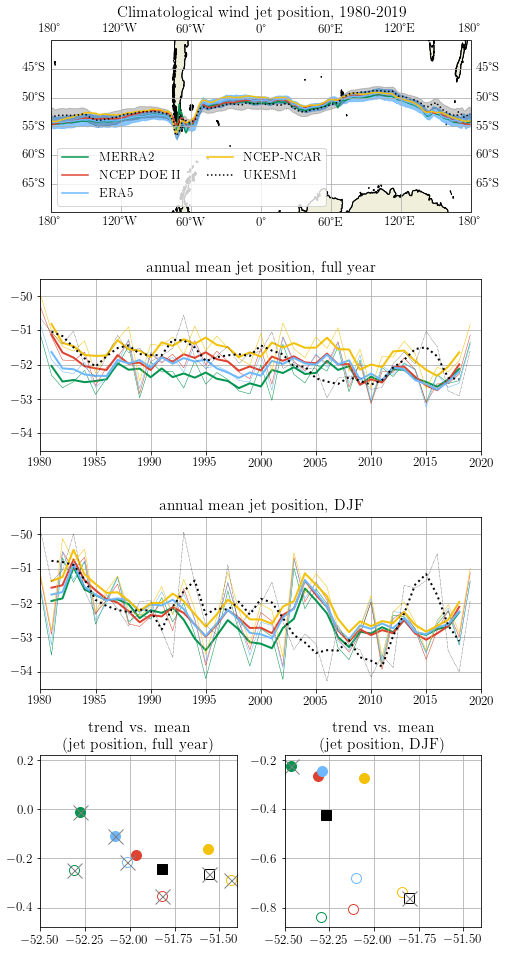

In [113]:
dss = ['MERRA','NCEP-DOE','ERA5','NCEP-NCAR','UKESM']
#dss = ['ERA5','UKESM']
#dss = ['ERA5']
reload(cd)
fact = 1.1
fig = plt.figure(figsize=(6.5*fact, 12*fact))
gs = fig.add_gridspec(4, 2)

ax = fig.add_subplot(gs[0, 0:2], projection = ccrs.PlateCarree())
ax.set_extent([0, 360, -70, -40], crs=ccrs.PlateCarree())

#subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

ax.set_title('Climatological wind jet position, 1980-2019')
# Set the extent of the map (lon_min, lon_max, lat_min, lat_max)
ax.set_extent([-180, 180, -70, -40], crs=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add land and ocean features
ax.add_feature(cfeature.LAND, edgecolor='black')
#ax.add_feature(cfeature.OCEAN)

for ds in dss:
    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY.nc')
    
    
    mnjet = np.roll(\
        np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'year').values),180)

    
    ax.plot(tdat.lon-180,mnjet, \
            color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'], 
            linestyle =cd.prod[ds]['linestyle'],\
            transform=ccrs.PlateCarree())
    if ds == 'UKESM':
        ts = xr.open_dataset(f'{idir}/{ds}_stdjet_FY.nc')
        stdjet  = np.roll(\
            np.squeeze(ts.__xarray_dataarray_variable__.values),180)
        ax.fill_between(tdat.lon-180,mnjet-stdjet,mnjet+stdjet,\
                        color=cd.prod[ds]['col'], alpha = 0.2)
    if ds == 'ERA5':
        ts = xr.open_dataset(f'{idir}/{ds}_stdjet_FY.nc')
        stdjet  = np.roll(\
            np.squeeze(ts.__xarray_dataarray_variable__.values),180)
        ax.fill_between(tdat.lon-180,mnjet-stdjet,mnjet+stdjet,\
                        color=cd.prod[ds]['col'], alpha = 0.8)
ax.set_aspect(4.91)
ax.legend(ncol = 2, loc = 'lower left')


# ax2 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0:2])
for ds in dss:

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY.nc')
    td = np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values)
    yr = tdat.year.values
    #moving_average(timeseries, n = 3)
    ax2.plot(tdat.year,td, color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'],\
            linestyle =cd.prod[ds]['linestyle'], linewidth = 0.5 )
    ax2.plot(yr[1:-1],moving_average(td), color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'],\
            linestyle =cd.prod[ds]['linestyle'], linewidth = 2)
ax2.set_ylim([-54.5,-49.5])
ax2.set_xlim([1980,2020])
ax2.grid()
ax2.set_title("annual mean jet position, full year")

# ax4 = fig.add_subplot(gs[1, 0:2])
ax3 = fig.add_subplot(gs[2, 0:2])
for ds in dss:

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_DJF.nc')
    td = np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values)
    yr = tdat.year.values
    #moving_average(timeseries, n = 3)
    ax3.plot(tdat.year,td, color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'],\
            linestyle =cd.prod[ds]['linestyle'], linewidth = 0.5 )
    ax3.plot(yr[1:-1],moving_average(td), color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'],\
            linestyle =cd.prod[ds]['linestyle'], linewidth = 2 )
ax3.set_ylim([-54.5,-49.5])
ax3.set_xlim([1980,2020])
ax3.grid()
ax3.set_title("annual mean jet position, full year")
ax3.set_title("annual mean jet position, DJF")


# ax6 = fig.add_subplot(gs[2, 0:2])
ax4 = fig.add_subplot(gs[3, 0:1])

for ds in dss:

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY.nc')
    a = np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values)[0:20]
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    print(f'{ds}  FY 1980-1999, {wym}, {lin_slope}, {lin_p}')
    alph = 1
    SW = False
    if lin_p > 0.05:
        print(f'{ds} SIGNIFICANCE WARNING')
        SW = True

    mkz = 'o'; ms = 10
    if ds == 'UKESM': mkz = 's'; ms = 10
    ax4.plot(wym, lin_slope*10, color ='w', \
             marker = mkz, markersize = ms, markeredgecolor = cd.prod[ds]['col'], alpha = alph)    
    if SW:
        ax4.plot(wym, lin_slope*10, color ='grey', \
             marker = 'x', markersize = ms+5)  
        
    a = np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values)
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    print(f'{ds}  FY 1980-1999, {wym}, {lin_slope}, {lin_p}')
    alph = 1
    SW = False
    if lin_p > 0.05:
        print(f'{ds} SIGNIFICANCE WARNING')
        SW = True

    mkz = 'o'; ms = 10
    if ds == 'UKESM': mkz = 's'; ms = 10
    ax4.plot(wym, lin_slope*10, color =cd.prod[ds]['col'], \
             marker = mkz, markersize = ms, markeredgecolor = cd.prod[ds]['col'], alpha = alph)    
    if SW:
        ax4.plot(wym, lin_slope*10, color ='grey', \
             marker = 'x', markersize = ms+5)  



ax5 = fig.add_subplot(gs[3, 1:2])
for ds in dss:

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_DJF.nc')
    a = np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values)[0:20]
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    print(f'{ds}  FY 1980-1999, {wym}, {lin_slope}, {lin_p}')
    alph = 1
    SW = False
    if lin_p > 0.05:
        print(f'{ds} SIGNIFICANCE WARNING')
        SW = True

    mkz = 'o'; ms = 10
    if ds == 'UKESM': mkz = 's'; ms = 10
    ax5.plot(wym, lin_slope*10, color ='w', \
             marker = mkz, markersize = ms, markeredgecolor = cd.prod[ds]['col'], alpha = alph)    
    if SW:
        ax5.plot(wym, lin_slope*10, color ='grey', \
             marker = 'x', markersize = ms+5)  
        
    a = np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values)
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    print(f'{ds}  FY 1980-1999, {wym}, {lin_slope}, {lin_p}')
    alph = 1
    SW = False
    if lin_p > 0.05:
        print(f'{ds} SIGNIFICANCE WARNING')
        SW = True

    mkz = 'o'; ms = 10
    if ds == 'UKESM': mkz = 's'; ms = 10
    ax5.plot(wym, lin_slope*10, color =cd.prod[ds]['col'], \
             marker = mkz, markersize = ms, markeredgecolor = cd.prod[ds]['col'], alpha = alph)    
    if SW:
        ax5.plot(wym, lin_slope*10, color ='grey', \
             marker = 'x', markersize = ms+5)  

ax4.set_title('trend vs. mean \n (jet position, full year)')
ax5.set_title('trend vs. mean \n (jet position, DJF)')

ofs = 1.2
ax4.set_xlim([-52.5,-52.6+ofs])
ax5.set_xlim([-52.5,-52.6+ofs])
o2 = 0.4
ax4.set_ylim([-0.88+o2,-0.18+o2])
ax5.set_ylim([-0.88,-0.18])

ax4.grid()
ax5.grid()
plt.tight_layout()
fig.savefig('./plts/Fig-jet.jpg', dpi = 300, bbox_inches='tight')


In [88]:
tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY.nc')
tdat

<xarray.Dataset>
Dimensions:                        (lon: 360, year: 40)
Coordinates:
  * lon                            (lon) float64 0.0 1.0 2.0 ... 358.0 359.0
  * year                           (year) int64 1980 1981 1982 ... 2018 2019
Data variables:
    __xarray_dataarray_variable__  (year, lon) float64 ...

In [98]:
tdat

<xarray.Dataset>
Dimensions:                        (lon: 360, year: 40)
Coordinates:
  * lon                            (lon) float64 0.0 1.0 2.0 ... 358.0 359.0
  * year                           (year) int64 1980 1981 1982 ... 2018 2019
Data variables:
    __xarray_dataarray_variable__  (year, lon) float64 -46.73 -46.83 ... -49.74

[-51.62307692 -53.51645062 -50.6870679  -51.40027778 -50.79978632
 -52.61521605 -51.89984568 -51.24450617 -52.54896215 -52.31222222
 -52.46916667 -51.84481481 -52.55173993 -52.00722222 -52.90969136
 -54.19932099 -53.01138584 -51.64753086 -52.83873457 -53.83358025]
MERRA  FY 1980-1999, -52.298029965404965, -0.08361444030303672, 0.017877148664015588
[-51.25143468 -52.91277778 -50.50527778 -51.03617284 -50.67472527
 -52.30938272 -51.90944444 -51.45006173 -52.60866911 -52.68287037
 -52.39549383 -51.97070988 -52.80863858 -51.58780864 -52.47132716
 -53.81358025 -52.65549451 -51.41842593 -52.54540123 -53.35962963]
NCEP-DOE  FY 1980-1999, -52.11836631732465, -0.08036375253355192, 0.013803018807545506
[-51.53965201 -53.22203704 -50.50925926 -51.32064815 -50.77521368
 -52.50021605 -52.01095679 -51.26219136 -52.33214286 -52.20635802
 -52.24145062 -51.67503086 -52.30659341 -51.73740741 -52.4845679
 -53.72231481 -52.66419414 -51.39768519 -52.52679012 -53.52212963]
ERA5  FY 1980-1999, -52.0978419651

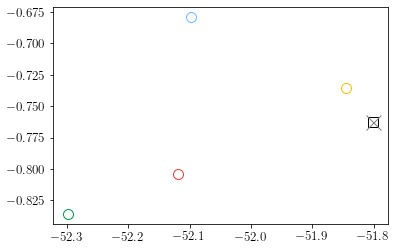

In [97]:
dss = ['MERRA','NCEP-DOE','ERA5','NCEP-NCAR','UKESM']

plt.figure()
for ds in dss:

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY.nc')
    a = np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values)[0:20]
    print(a)
    wym = np.mean(a)
    mk_slope, mk_p, lin_slope, lin_p = give_trends(a)
    print(f'{ds}  FY 1980-1999, {wym}, {lin_slope}, {lin_p}')
    alph = 1
    SW = False
    if lin_p > 0.05:
        print(f'{ds} SIGNIFICANCE WARNING')
        SW = True

    mkz = 'o'; ms = 10
    if ds == 'UKESM': mkz = 's'; ms = 10
    plt.plot(wym, lin_slope*10, color ='w', \
             marker = mkz, markersize = ms, markeredgecolor = cd.prod[ds]['col'], alpha = alph)    
    if SW:
        plt.plot(wym, lin_slope*10, color ='grey', \
             marker = 'x', markersize = ms+5)  

In [76]:
yr[1:-1]

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019])

In [27]:
print(tdat.lon)

<xarray.DataArray 'lon' (lon: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.])
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X


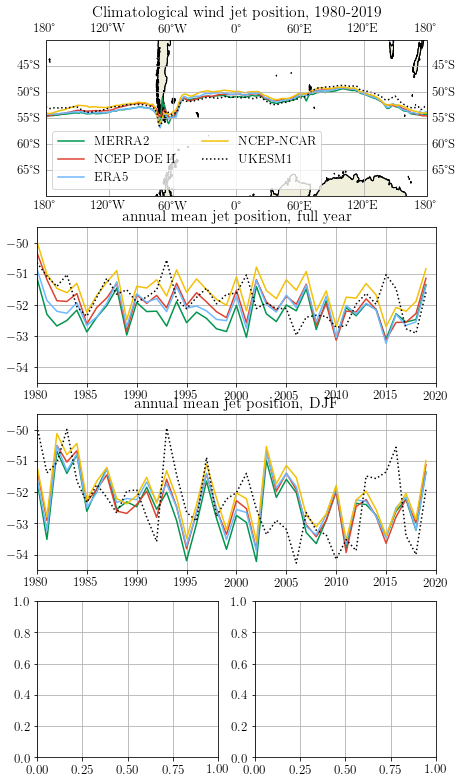

In [111]:
dss = ['MERRA','NCEP-DOE','ERA5','NCEP-NCAR','UKESM']

fact = 1.1
fig = plt.figure(figsize=(6.5*fact, 12*fact))
gs = fig.add_gridspec(4, 2)

ax = fig.add_subplot(gs[0, 0:2], projection = ccrs.PlateCarree())

ax.set_title('Climatological wind jet position, 1980-2019')
# Set the extent of the map (lon_min, lon_max, lat_min, lat_max)
ax.set_extent([-180, 180, -70, -40], crs=ccrs.PlateCarree())

# Add coastlines and gridlines
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add land and ocean features
ax.add_feature(cfeature.LAND, edgecolor='black')
#ax.add_feature(cfeature.OCEAN)

for ds in dss:
    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY.nc')
    ax.plot(tdat.lon,np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'year').values), \
            color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'], 
            linestyle =cd.prod[ds]['linestyle'],\
            transform=ccrs.PlateCarree())

ax.set_aspect(4.91)
ax.legend(ncol = 2, loc = 'lower left')


# ax2 = fig.add_subplot(gs[0, 0:2])
ax2 = fig.add_subplot(gs[1, 0:2])
for ds in dss:

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY.nc')
    td = tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values
    ax2.plot(tdat.year,td, color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'],\
            linestyle =cd.prod[ds]['linestyle'] )
ax2.set_ylim([-54.5,-49.5])
ax2.set_xlim([1980,2020])
ax2.grid()
ax2.set_title("annual mean jet position, full year")

# ax4 = fig.add_subplot(gs[1, 0:2])
ax3 = fig.add_subplot(gs[2, 0:2])
for ds in dss:

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_DJF.nc')
    td = tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values
    ax3.plot(tdat.year,td, color=cd.prod[ds]['col'], label = cd.prod[ds]['fnam'],\
            linestyle =cd.prod[ds]['linestyle'] )
ax3.set_ylim([-54.5,-49.5])
ax3.set_xlim([1980,2020])
ax3.grid()
ax3.set_title("annual mean jet position, DJF")


# ax6 = fig.add_subplot(gs[2, 0:2])
ax4 = fig.add_subplot(gs[3, 0:1])
ax5 = fig.add_subplot(gs[3, 1:2])


## jetpos

In [12]:

import pymannkendall as mk
from scipy import stats

def give_trends(ts_y):

    ts_x = np.arange(0,len(ts_y))
    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


In [13]:
plt.figure()
    
for ds in dss:
    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY.nc')
    td = np.squeeze(tdat.__xarray_dataarray_variable__.mean(dim = 'lon').values)
    print(len(td))

41
41
41
41
41


<Figure size 432x288 with 0 Axes>

## position and trend

In [14]:
ex = True

def make_yearlist(tdat, yrst = 1980, yrend = 2019, baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/JETLAT_{tdat}_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

era5 = xr.open_mfdataset(make_yearlist('ERA5'))
ncep = xr.open_mfdataset(make_yearlist('NCEP-NCAR'))
doe = xr.open_mfdataset(make_yearlist('NCEP-DOE'))
ukesm = xr.open_mfdataset(make_yearlist('UKESM'))
ukesm = xr.open_mfdataset(make_yearlist('MERRA'))

dss = ['NCEP-DOE','ERA5','NCEP-NCAR','UKESM','MERRA',]

if ex:
    for ds in dss:
        print(ds)
        tdat = xr.open_mfdataset(make_yearlist(ds))
        tdat_fy = tdat.groupby('time_counter.year').mean()
        tdat_djf = tdat.sel(time_counter=(tdat['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
        tdat_mam = tdat.sel(time_counter=(tdat['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
        tdat_jja = tdat.sel(time_counter=(tdat['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
        tdat_son = tdat.sel(time_counter=(tdat['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()

        tdat_fy.rename({"__xarray_dataarray_variable__": "lat"})
        tdat_djf.rename({"__xarray_dataarray_variable__": "lat"})
        tdat_mam.rename({"__xarray_dataarray_variable__": "lat"})
        tdat_jja.rename({"__xarray_dataarray_variable__": "lat"})
        tdat_son.rename({"__xarray_dataarray_variable__": "lat"})

        tdat_fy.to_netcdf(f'{idir}/{ds}_mnjet_FY_1980-2019.nc')
        tdat_djf.to_netcdf(f'{idir}/{ds}_mnjet_DJF_1980-2019.nc')
        tdat_mam.to_netcdf(f'{idir}/{ds}_mnjet_MAM_1980-2019.nc')
        tdat_jja.to_netcdf(f'{idir}/{ds}_mnjet_SON_1980-2019.nc')
        tdat_son.to_netcdf(f'{idir}/{ds}_mnjet_JJA_1980-2019.nc')



NCEP-DOE
ERA5
NCEP-NCAR
UKESM
MERRA


In [15]:
# ex = True
# if ex:
#     data = np.zeros([5,5])

#     #n = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']

#     df = pd.DataFrame(data, columns=['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM'],\
#                       index  = ['full year','DJF','MAM', 'JJA', 'SON',])
#     df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
#     #df.to_csv(f'./plts/allmod_mn_windspeed_1980-2019_60-40S.csv')

In [16]:
dss = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']

data = np.zeros([5,5])
for i in range(0,5):
    ds = dss[i]

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY_1980-2019.nc')
    data[0,i] = tdat.__xarray_dataarray_variable__.mean(dim = 'lon').mean(dim = 'year').values
    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_DJF_1980-2019.nc')
    data[1,i] = tdat.__xarray_dataarray_variable__.mean(dim = 'lon').mean(dim = 'year').values
    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_MAM_1980-2019.nc')
    data[2,i] = tdat.__xarray_dataarray_variable__.mean(dim = 'lon').mean(dim = 'year').values
    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_JJA_1980-2019.nc')
    data[3,i] = tdat.__xarray_dataarray_variable__.mean(dim = 'lon').mean(dim = 'year').values
    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_SON_1980-2019.nc')
    data[4,i] = tdat.__xarray_dataarray_variable__.mean(dim = 'lon').mean(dim = 'year').values
        
    i = i+1
    

df = pd.DataFrame(data, columns=['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM'],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])
df.attrs = {"made in": 'plottingCode/jetposition.ipynb'}
df.to_csv(f'./plts/jet-position-clim-1980-2019.csv')

In [17]:

import pymannkendall as mk
from scipy import stats

def give_trends(ts_y):

    ts_x = np.arange(0,len(ts_y))
    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


In [18]:
dss = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']

data = np.zeros([5,5])
sig = np.zeros([5,5])
for i in range(0,5):
    ds = dss[i]

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_FY_1980-2019.nc')
    td = tdat.__xarray_dataarray_variable__.squeeze().mean(dim = 'lon').values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[0,i] = lin_slope* 10
    sig[0,i] = lin_p


    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_DJF_1980-2019.nc')
    td = tdat.__xarray_dataarray_variable__.squeeze().mean(dim = 'lon').values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[1,i] = lin_slope* 10
    sig[1,i] = lin_p


    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_MAM_1980-2019.nc')
    td = tdat.__xarray_dataarray_variable__.squeeze().mean(dim = 'lon').values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[2,i] = lin_slope* 10
    sig[2,i] = lin_p

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_JJA_1980-2019.nc')
    td = tdat.__xarray_dataarray_variable__.squeeze().mean(dim = 'lon').values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[3,i] = lin_slope* 10
    sig[3,i] = lin_p

    tdat = xr.open_dataset(f'{idir}/{ds}_mnjet_SON_1980-2019.nc')
    td = tdat.__xarray_dataarray_variable__.squeeze().mean(dim = 'lon').values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[4,i] = lin_slope * 10
    sig[4,i] = lin_p
        
    i = i+1
    

df = pd.DataFrame(data, columns=['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM'],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])
df2 = pd.DataFrame(sig, columns=['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM'],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])

df.attrs = {"made in": 'plottingCode/jetposition.ipynb'}
df.to_csv(f'./plts/jet-position-trend-1980-2019.csv')
df2.attrs = {"made in": 'plottingCode/jetposition.ipynb'}
df2.to_csv(f'./plts/jet-position-trendsig-1980-2019.csv')

In [19]:
df

,ERA5,NCEP-NCAR,MERRA,NCEP-DOE,UKESM
full year,-0.107455,-0.163235,-0.011213,-0.184357,-0.242194
DJF,-0.242172,-0.274066,-0.221549,-0.264803,-0.423603
MAM,-0.132025,-0.244386,-0.119686,-0.222460,-0.355571
JJA,-0.005687,-0.023320,0.187218,-0.070971,0.116507
SON,-0.051863,-0.112382,0.106859,-0.180064,-0.306109
